In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from dateutil import parser
import seaborn as sns
from scipy.stats import norm
from scipy.stats import genextreme as gev
from scipy.stats import pareto 
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point, Polygon
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import random

# Investigate Racial Makeup of Census Block Groups & Tracts in 2020

In [33]:
blocks2020shape = gpd.read_file('Data/Census2020_BlockGroups/Census2020_BlockGroups.shp')
tract2020shape = gpd.read_file('Data/Census2020_Tracts/Census2020_Tracts.shp')

In [34]:
blocks2020shape.head()

,OBJECTID,STATEFP20,COUNTYFP20,TRACTCE20,BLKGRPCE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,Shape_STAr,Shape_STLe,geometry
0,1,25,025,040600,1,250250406001,Block Group 1,G5030,S,1265377.0,413598.0,+42.3833695,-071.0707743,1.807118e+07,29256.866068,"POLYGON ((769378.692 2964626.314, 769385.078 2..."
1,2,25,025,051101,1,250250511011,Block Group 1,G5030,S,220626.0,0.0,+42.3882285,-071.0046816,2.374654e+06,9142.174252,"POLYGON ((788317.786 2966115.262, 788838.563 2..."
2,3,25,025,051101,4,250250511014,Block Group 4,G5030,S,227071.0,270.0,+42.3913407,-071.0020343,2.446949e+06,11579.546171,"POLYGON ((789538.125 2967889.427, 789539.214 2..."
3,4,25,025,981600,1,250259816001,Block Group 1,G5030,S,586981.0,158777.0,+42.3886205,-070.9934424,8.026752e+06,16626.718823,"POLYGON ((790938.417 2966482.118, 790974.619 2..."
4,5,25,025,010204,3,250250102043,Block Group 3,G5030,S,145888.0,0.0,+42.3459611,-071.1020344,1.570220e+06,5510.560013,"POLYGON ((762928.668 2951612.031, 763063.607 2..."


In [35]:
blocks2010shape = gpd.read_file('Data/CBG_Boston_2010_BARI/Census Block Groups.shp')
#blocks2010shape = blocks2010shape[blocks2010shape['COUNTYFP10'] == '025']
blocks2010shape.head()

,OBJECTID,GEOID10,ALAND10,AWATER10,POP100,HU100,Type,Res,BG_ID_10,CT_ID_10,...,ZIPCODE,City_Counc,WARD,ISD_Nbhd,Police_Dis,Fire_Distr,PWD,Shape_Leng,Shape_Area,geometry
0,1,250250101031,101211.0,0.0,2111.0,309.0,I,0.0,250250101031,25025010103,...,2215.0,8.0,21.0,Fenway/Kenmore,4.0,4.0,1-10A: Kenmore/Fenway/Mission Hill,0.020754,0.000011,"POLYGON ((-71.10520 42.34844, -71.10682 42.348..."
1,2,250250104053,39125.0,0.0,626.0,355.0,I,0.0,250250104053,25025010405,...,2115.0,7.0,4.0,Fenway/Kenmore,4.0,4.0,1-10A: Kenmore/Fenway/Mission Hill,0.008288,0.000004,"POLYGON ((-71.08350 42.34126, -71.08431 42.340..."
2,3,250250102033,67710.0,0.0,1563.0,1078.0,I,0.0,250250102033,25025010203,...,2215.0,8.0,5.0,Fenway/Kenmore,4.0,4.0,1-10A: Kenmore/Fenway/Mission Hill,0.012436,0.000007,"POLYGON ((-71.09841 42.34079, -71.09863 42.340..."
3,4,250250102032,115062.0,0.0,2369.0,1526.0,I,0.0,250250102032,25025010203,...,2215.0,8.0,5.0,Fenway/Kenmore,4.0,4.0,1-10A: Kenmore/Fenway/Mission Hill,0.015750,0.000013,"POLYGON ((-71.10252 42.34337, -71.10242 42.343..."
4,5,250250102041,39843.0,0.0,1098.0,287.0,I,0.0,250250102041,25025010204,...,2215.0,8.0,21.0,Fenway/Kenmore,4.0,4.0,1-10A: Kenmore/Fenway/Mission Hill,0.012847,0.000004,"POLYGON ((-71.10520 42.34844, -71.10468 42.348..."


In [36]:
print(len(blocks2020shape),len(blocks2010shape))

581 558


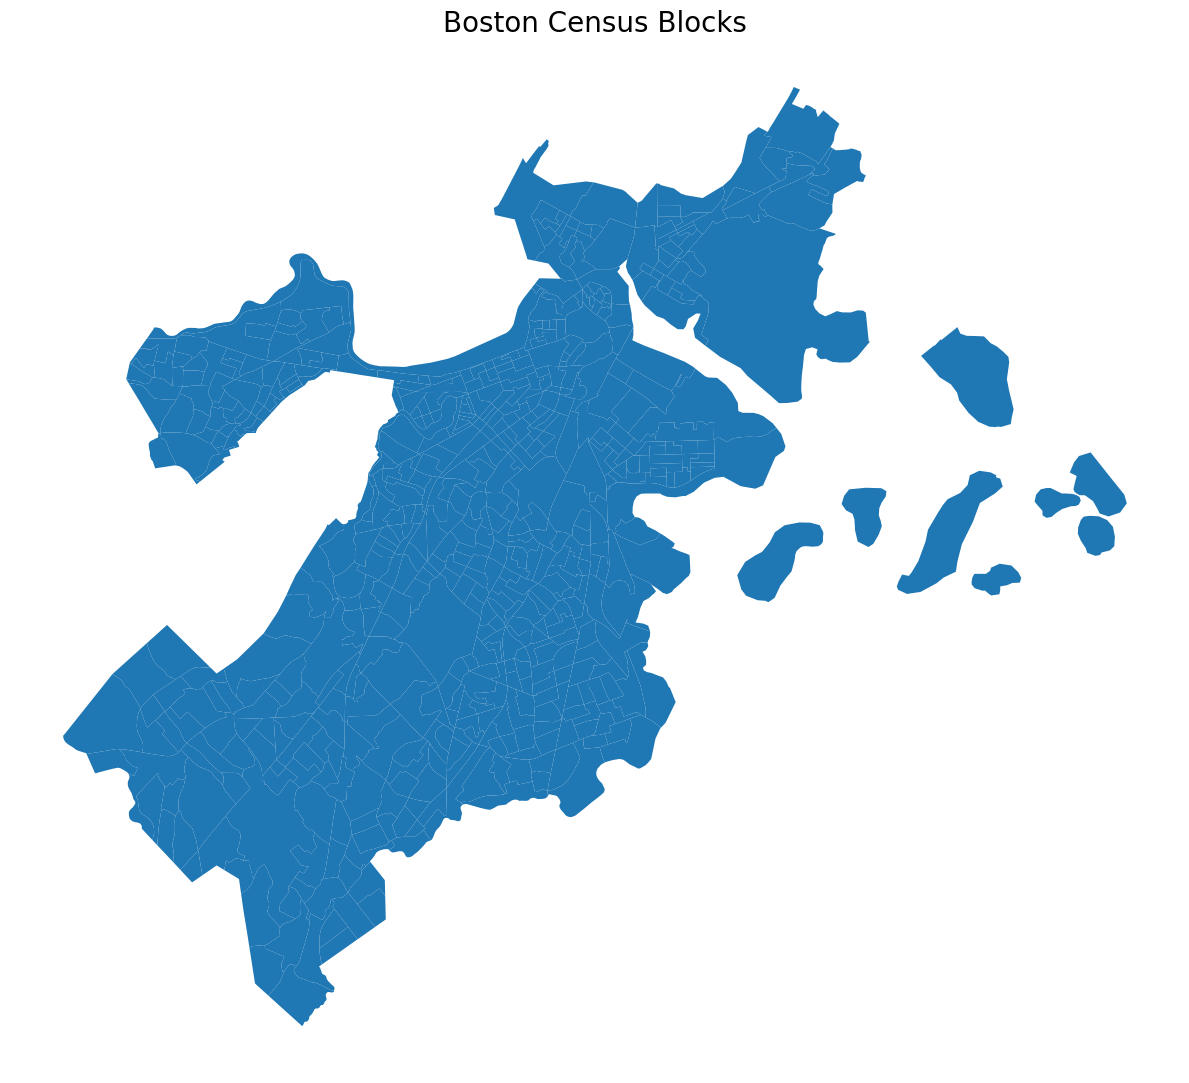

In [37]:
fig, ax = plt.subplots(figsize=(12,12))
blocks2020shape.plot(ax=ax)
ax.set_title('Boston Census Blocks', fontsize=20)
fig.patch.set_visible(False)
ax.axis('off')
plt.tight_layout()

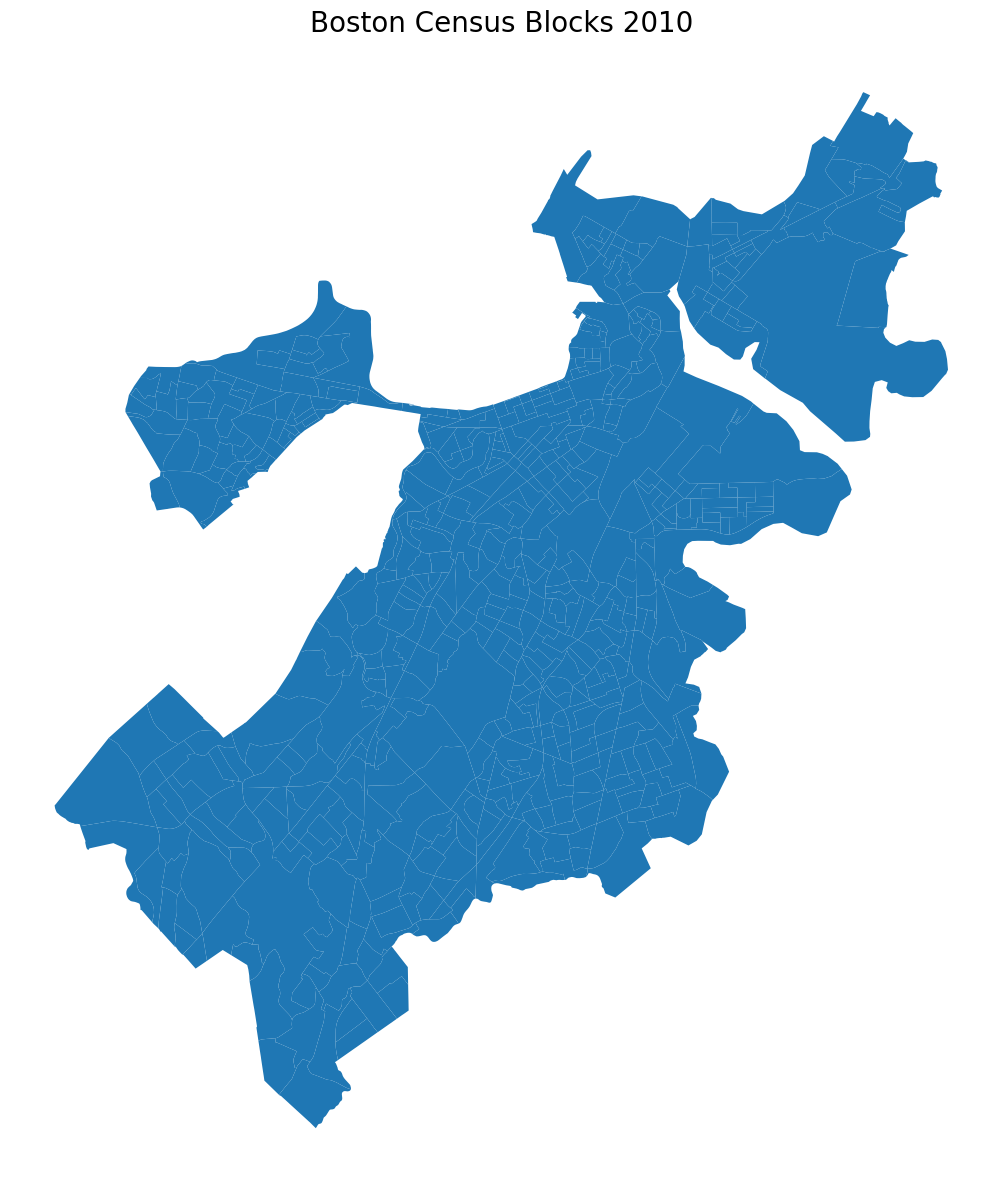

In [38]:
fig, ax = plt.subplots(figsize=(12,12))
blocks2010shape.plot(ax=ax)
ax.set_title('Boston Census Blocks 2010', fontsize=20)
fig.patch.set_visible(False)
ax.axis('off')
plt.tight_layout()

In [39]:
tract20 = pd.read_csv('Data/census-tract-data.csv', header = 1)
tract20.head()

,field concept,State/US-Abbreviation (USPS),Summary Level,Geographic Record Identifier,Geographic Code Identifier,Region,Division,State (FIPS),County (FIPS),County Subdivision (FIPS),...,Juvenile facilities,Nursing facilities/Skilled-nursing facilities,Other institutional facilities,Noninstitutionalized population:,College/University student housing,Military quarters,Other noninstitutional facilities,Total:.3,Occupied,Vacant
0,PLST,MA,140,1400000US25025000101,25025000101,1,1,25,25,NaN,...,0,0,0,10,0,0,10,726,697,29
1,PLST,MA,140,1400000US25025000102,25025000102,1,1,25,25,NaN,...,7,0,0,10,0,0,10,1695,1606,89
2,PLST,MA,140,1400000US25025000201,25025000201,1,1,25,25,NaN,...,6,0,0,39,0,0,39,1608,1544,64
3,PLST,MA,140,1400000US25025000202,25025000202,1,1,25,25,NaN,...,0,0,0,41,0,0,41,1606,1539,67
4,PLST,MA,140,1400000US25025000301,25025000301,1,1,25,25,NaN,...,0,99,0,1,0,0,1,1337,1290,47


In [40]:
tract20.columns

Index(['field concept', 'State/US-Abbreviation (USPS)', 'Summary Level',
       'Geographic Record Identifier', 'Geographic Code Identifier', 'Region',
       'Division', 'State (FIPS)', 'County (FIPS)',
       'County Subdivision (FIPS)', 'Census Tract', 'Total:', 'White alone',
       'Black or African American alone', 'Hispanic or Latino', 'Asian alone',
       'American Indian and Alaska Native alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some Other Race alone', 'Population of two or more races:', 'Total:.1',
       'White alone.1', 'Black or African American alone.1',
       'Hispanic or Latino.1', 'Asian alone.1',
       'American Indian and Alaska Native alone.1',
       'Native Hawaiian and Other Pacific Islander alone.1',
       'Some Other Race alone.1', 'Population of two or more races:.1',
       'Total:.2', 'Institutionalized population:',
       'Correctional facilities for adults', 'Juvenile facilities',
       'Nursing facilities/Skilled-nu

In [41]:
tract20.dtypes

field concept                                          object
State/US-Abbreviation (USPS)                           object
Summary Level                                           int64
Geographic Record Identifier                           object
Geographic Code Identifier                              int64
Region                                                  int64
Division                                                int64
State (FIPS)                                            int64
County (FIPS)                                           int64
County Subdivision (FIPS)                             float64
Census Tract                                            int64
Total:                                                  int64
White alone                                             int64
Black or African American alone                         int64
Hispanic or Latino                                      int64
Asian alone                                             int64
American

In [42]:
tract2020shape['GEOID20'].dtypes

dtype('O')

In [43]:
tract2020shape['GEOID20'] = pd.to_numeric(tract2020shape['GEOID20'])

In [44]:
tract20 = tract20.merge(tract2020shape,left_on = 'Geographic Code Identifier', right_on = 'GEOID20')

In [45]:
tract20.head()

,field concept,State/US-Abbreviation (USPS),Summary Level,Geographic Record Identifier,Geographic Code Identifier,Region,Division,State (FIPS),County (FIPS),County Subdivision (FIPS),...,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,Shape_STAr,Shape_STLe,geometry
0,PLST,MA,140,1400000US25025000101,25025000101,1,1,25,25,NaN,...,Census Tract,G5020,S,249924,0,+42.3608778,-071.1330510,2.689987e+06,6460.712298,"POLYGON ((754384.600 2956481.065, 754456.046 2..."
1,PLST,MA,140,1400000US25025000102,25025000102,1,1,25,25,NaN,...,Census Tract,G5020,S,1067435,0,+42.3590809,-071.1439885,1.148901e+07,17955.010521,"POLYGON ((747818.440 2955894.264, 747928.987 2..."
2,PLST,MA,140,1400000US25025000201,25025000201,1,1,25,25,NaN,...,Census Tract,G5020,S,599227,0,+42.3540651,-071.1611678,6.449574e+06,13138.949008,"POLYGON ((745956.783 2953940.535, 745974.847 2..."
3,PLST,MA,140,1400000US25025000202,25025000202,1,1,25,25,NaN,...,Census Tract,G5020,S,601636,0,+42.3526051,-071.1543443,6.475527e+06,12739.927991,"POLYGON ((747917.348 2953724.860, 748021.932 2..."
4,PLST,MA,140,1400000US25025000301,25025000301,1,1,25,25,NaN,...,Census Tract,G5020,S,571431,0,+42.3541444,-071.1688200,6.150417e+06,12097.388244,"POLYGON ((744073.131 2952922.357, 744085.351 2..."


In [46]:
df_race = tract20[['Geographic Code Identifier', 'Census Tract', 'Total:', 'White alone',
       'Black or African American alone', 'Hispanic or Latino', 'Asian alone',
       'American Indian and Alaska Native alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some Other Race alone', 'Population of two or more races:','geometry']]

In [47]:
df_race.head()

,Geographic Code Identifier,Census Tract,Total:,White alone,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:,geometry
0,25025000101,101,1876,1211,83,183,274,7,0,39,79,"POLYGON ((754384.600 2956481.065, 754456.046 2..."
1,25025000102,102,3714,1565,298,554,883,8,2,177,227,"POLYGON ((747818.440 2955894.264, 747928.987 2..."
2,25025000201,201,3953,2712,138,422,421,1,0,101,158,"POLYGON ((745956.783 2953940.535, 745974.847 2..."
3,25025000202,202,4148,2394,221,778,536,1,0,64,154,"POLYGON ((747917.348 2953724.860, 748021.932 2..."
4,25025000301,301,3136,2218,120,265,403,0,1,30,99,"POLYGON ((744073.131 2952922.357, 744085.351 2..."


In [48]:
clms = ['White alone',
       'Black or African American alone', 'Hispanic or Latino', 'Asian alone',
       'American Indian and Alaska Native alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some Other Race alone', 'Population of two or more races:']

for clm in clms:
    df_race[clm+' Percent Total'] = df_race[clm]/df_race['Total:']
df_race.head()

,Geographic Code Identifier,Census Tract,Total:,White alone,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:,geometry,White alone Percent Total,Black or African American alone Percent Total,Hispanic or Latino Percent Total,Asian alone Percent Total,American Indian and Alaska Native alone Percent Total,Native Hawaiian and Other Pacific Islander alone Percent Total,Some Other Race alone Percent Total,Population of two or more races: Percent Total
0,25025000101,101,1876,1211,83,183,274,7,0,39,79,"POLYGON ((754384.600 2956481.065, 754456.046 2...",0.645522,0.044243,0.097548,0.146055,0.003731,0.000000,0.020789,0.042111
1,25025000102,102,3714,1565,298,554,883,8,2,177,227,"POLYGON ((747818.440 2955894.264, 747928.987 2...",0.421379,0.080237,0.149165,0.237749,0.002154,0.000539,0.047658,0.061120
2,25025000201,201,3953,2712,138,422,421,1,0,101,158,"POLYGON ((745956.783 2953940.535, 745974.847 2...",0.686061,0.034910,0.106754,0.106501,0.000253,0.000000,0.025550,0.039970
3,25025000202,202,4148,2394,221,778,536,1,0,64,154,"POLYGON ((747917.348 2953724.860, 748021.932 2...",0.577146,0.053279,0.187560,0.129219,0.000241,0.000000,0.015429,0.037126
4,25025000301,301,3136,2218,120,265,403,0,1,30,99,"POLYGON ((744073.131 2952922.357, 744085.351 2...",0.707270,0.038265,0.084503,0.128508,0.000000,0.000319,0.009566,0.031569


In [49]:
df_race = gpd.GeoDataFrame(df_race, geometry = df_race['geometry'], crs={'init': 'epsg:4326'})

<AxesSubplot:>

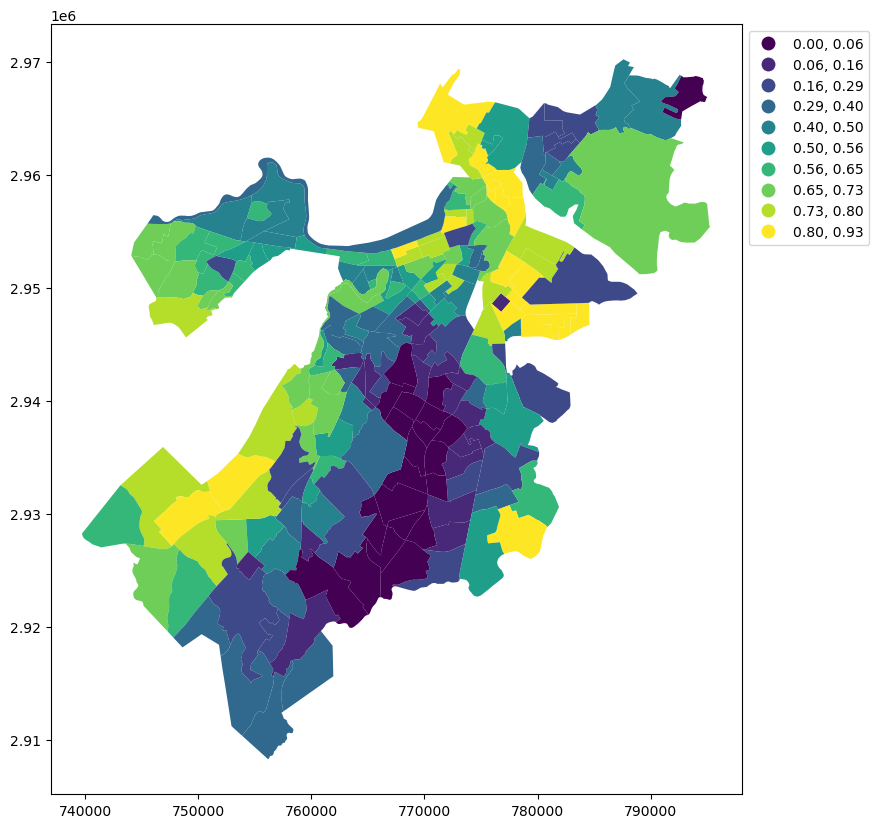

In [50]:
df_race.plot(column='White alone Percent Total', k=10, scheme='Quantiles',legend=True, figsize = (10,10)
             ,legend_kwds={'bbox_to_anchor': (1, 1),'loc': 'upper left'})

<AxesSubplot:>

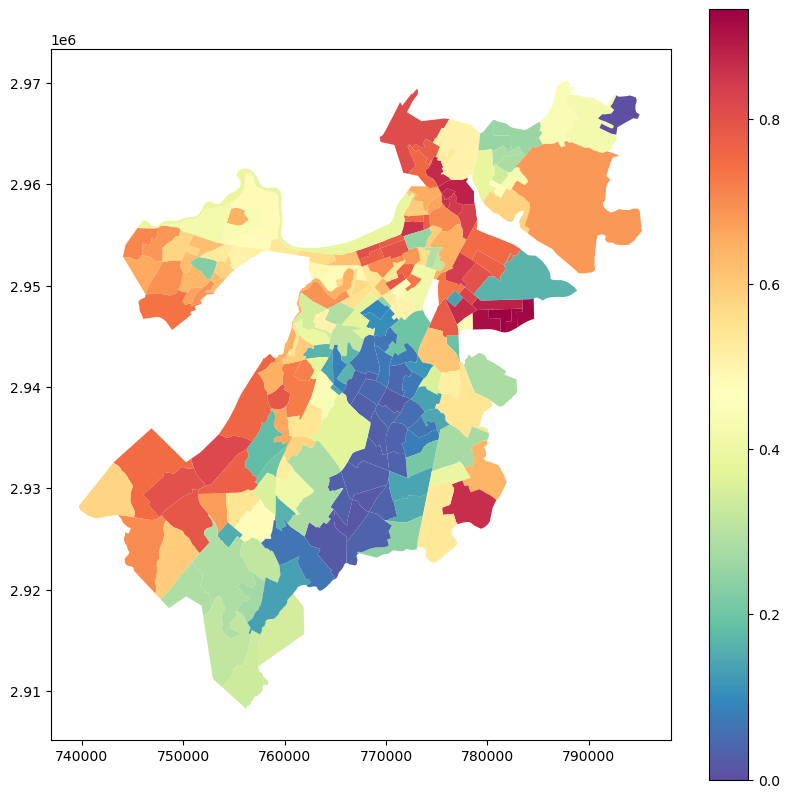

In [51]:
df_race.plot(column='White alone Percent Total', cmap='Spectral_r',legend=True, figsize = (10,10))

In [52]:
df_race.crs

<Derived Projected CRS: PROJCS["NAD83 / Massachusetts Mainland (ftUS)",GEO ...>
Name: NAD83 / Massachusetts Mainland (ftUS)
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [55]:
blockg20 = pd.read_csv('Data/census-block-group-data.csv', header = 1)
blockg20[['Geographic Code Identifier', 'Region',
       'Division', 'State (FIPS)', 'County (FIPS)',
       'County Subdivision (FIPS)', 'Census Tract', 'Block Group',
       'GEOID 2020 block group']].head()

,Geographic Code Identifier,Region,Division,State (FIPS),County (FIPS),County Subdivision (FIPS),Census Tract,Block Group,GEOID 2020 block group
0,2.500000e+11,1,1,25,25,NaN,101,1,2.500000e+11
1,2.500000e+11,1,1,25,25,NaN,101,2,2.500000e+11
2,2.500000e+11,1,1,25,25,NaN,102,1,2.500000e+11
3,2.500000e+11,1,1,25,25,NaN,102,2,2.500000e+11
4,2.500000e+11,1,1,25,25,NaN,201,1,2.500000e+11


In [56]:
len(blockg20)

581

In [57]:
blockg20.columns

Index(['field concept', 'State/US-Abbreviation (USPS)', 'Summary Level',
       'Geographic Record Identifier', 'Geographic Code Identifier', 'Region',
       'Division', 'State (FIPS)', 'County (FIPS)',
       'County Subdivision (FIPS)', 'Census Tract', 'Block Group',
       'GEOID 2020 block group', 'Total:', 'White alone',
       'Black or African American alone', 'Hispanic or Latino', 'Asian alone',
       'American Indian and Alaska Native alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some Other Race alone', 'Population of two or more races:', 'Total:.1',
       'White alone.1', 'Black or African American alone.1',
       'Hispanic or Latino.1', 'Asian alone.1',
       'American Indian and Alaska Native alone.1',
       'Native Hawaiian and Other Pacific Islander alone.1',
       'Some Other Race alone.1', 'Population of two or more races:.1',
       'Total:.2', 'Institutionalized population:',
       'Correctional facilities for adults', 'Juvenile fa

In [58]:
blockg20.dtypes

field concept                                          object
State/US-Abbreviation (USPS)                           object
Summary Level                                           int64
Geographic Record Identifier                           object
Geographic Code Identifier                            float64
Region                                                  int64
Division                                                int64
State (FIPS)                                            int64
County (FIPS)                                           int64
County Subdivision (FIPS)                             float64
Census Tract                                            int64
Block Group                                             int64
GEOID 2020 block group                                float64
Total:                                                  int64
White alone                                             int64
Black or African American alone                         int64
Hispanic

In [59]:
blockg20['Geographic Code Identifier'] = blockg20['Geographic Record Identifier'].astype(str).str[-12:]
blockg20['Geographic Code Identifier'] = pd.to_numeric(blockg20['Geographic Code Identifier'])

blocks2020shape = blocks2020shape.to_crs('epsg:4326')
blocks2020shape['GEOID20'] = pd.to_numeric(blocks2020shape['GEOID20'])

blockg20 = blockg20.merge(blocks2020shape, left_on = 'Geographic Code Identifier', right_on = 'GEOID20')
print(len(blocks2020shape['GEOID20'].unique()))
print(len(blockg20['Geographic Code Identifier'].unique()))
print(len(blockg20))

581
580
580


In [60]:
blockg20 = gpd.GeoDataFrame(
        blockg20[['Geographic Code Identifier', 'Census Tract', 'Total:', 'White alone',
       'Black or African American alone', 'Hispanic or Latino', 'Asian alone',
       'American Indian and Alaska Native alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some Other Race alone', 'Population of two or more races:','geometry']]
        , geometry = blockg20['geometry'], crs={'init': 'epsg:4326'})

In [61]:
blockg20.head()

,Geographic Code Identifier,Census Tract,Total:,White alone,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:,geometry
0,250250001011,101,1052,643,54,113,180,1,0,28,33,"POLYGON ((-71.13605 42.36143, -71.13582 42.361..."
1,250250001012,101,824,568,29,70,94,6,0,11,46,"POLYGON ((-71.13660 42.36016, -71.13633 42.360..."
2,250250001021,102,1020,565,42,145,160,3,0,41,64,"POLYGON ((-71.14445 42.35871, -71.14439 42.359..."
3,250250001022,102,2694,1000,256,409,723,5,2,136,163,"POLYGON ((-71.16090 42.35862, -71.16049 42.358..."
4,250250002011,201,966,650,25,97,121,0,0,16,57,"POLYGON ((-71.16244 42.35597, -71.16233 42.356..."


In [62]:
clms = ['White alone',
       'Black or African American alone', 'Hispanic or Latino', 'Asian alone',
       'American Indian and Alaska Native alone',
       'Native Hawaiian and Other Pacific Islander alone',
       'Some Other Race alone', 'Population of two or more races:']

for clm in clms:
    blockg20[clm+' Percent Total'] = blockg20[clm]/blockg20['Total:']
blockg20.head()

,Geographic Code Identifier,Census Tract,Total:,White alone,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:,geometry,White alone Percent Total,Black or African American alone Percent Total,Hispanic or Latino Percent Total,Asian alone Percent Total,American Indian and Alaska Native alone Percent Total,Native Hawaiian and Other Pacific Islander alone Percent Total,Some Other Race alone Percent Total,Population of two or more races: Percent Total
0,250250001011,101,1052,643,54,113,180,1,0,28,33,"POLYGON ((-71.13605 42.36143, -71.13582 42.361...",0.611217,0.051331,0.107414,0.171103,0.000951,0.000000,0.026616,0.031369
1,250250001012,101,824,568,29,70,94,6,0,11,46,"POLYGON ((-71.13660 42.36016, -71.13633 42.360...",0.689320,0.035194,0.084951,0.114078,0.007282,0.000000,0.013350,0.055825
2,250250001021,102,1020,565,42,145,160,3,0,41,64,"POLYGON ((-71.14445 42.35871, -71.14439 42.359...",0.553922,0.041176,0.142157,0.156863,0.002941,0.000000,0.040196,0.062745
3,250250001022,102,2694,1000,256,409,723,5,2,136,163,"POLYGON ((-71.16090 42.35862, -71.16049 42.358...",0.371195,0.095026,0.151819,0.268374,0.001856,0.000742,0.050483,0.060505
4,250250002011,201,966,650,25,97,121,0,0,16,57,"POLYGON ((-71.16244 42.35597, -71.16233 42.356...",0.672878,0.025880,0.100414,0.125259,0.000000,0.000000,0.016563,0.059006


<AxesSubplot:>

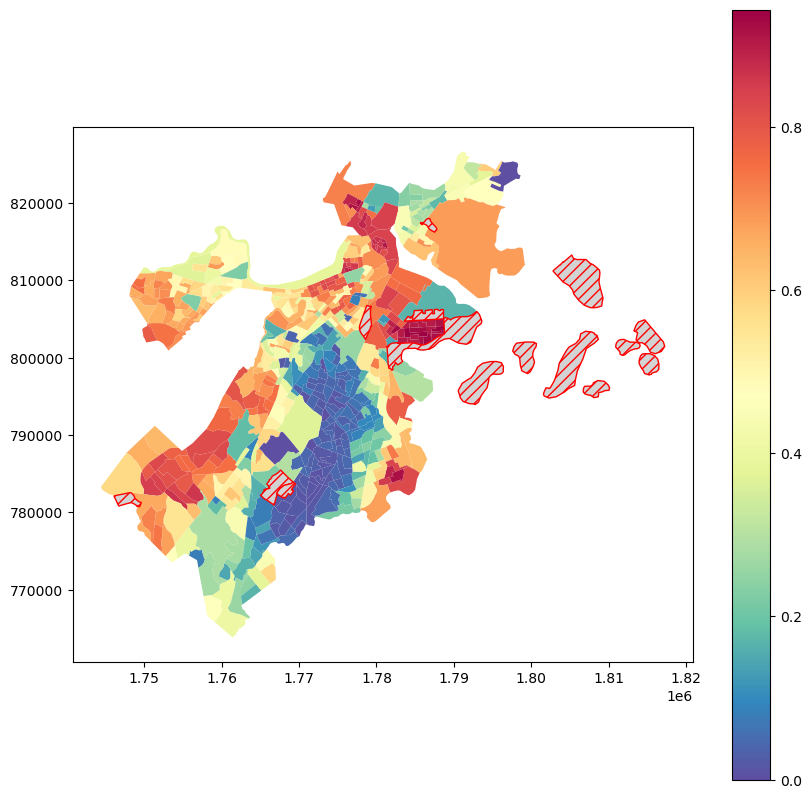

In [63]:
blockg20.to_crs({'init': 'epsg:2263'}).plot(column='White alone Percent Total',
                                            cmap='Spectral_r',legend=True
                                           ,markersize=0.01,figsize=(10,10),
                                            missing_kwds={"color": "lightgrey", ## what to do with missing values
                                                            "edgecolor": "red",
                                                            "hatch": "///",
                                                            "label": "Missing values",
                                                                                    },)

<AxesSubplot:>

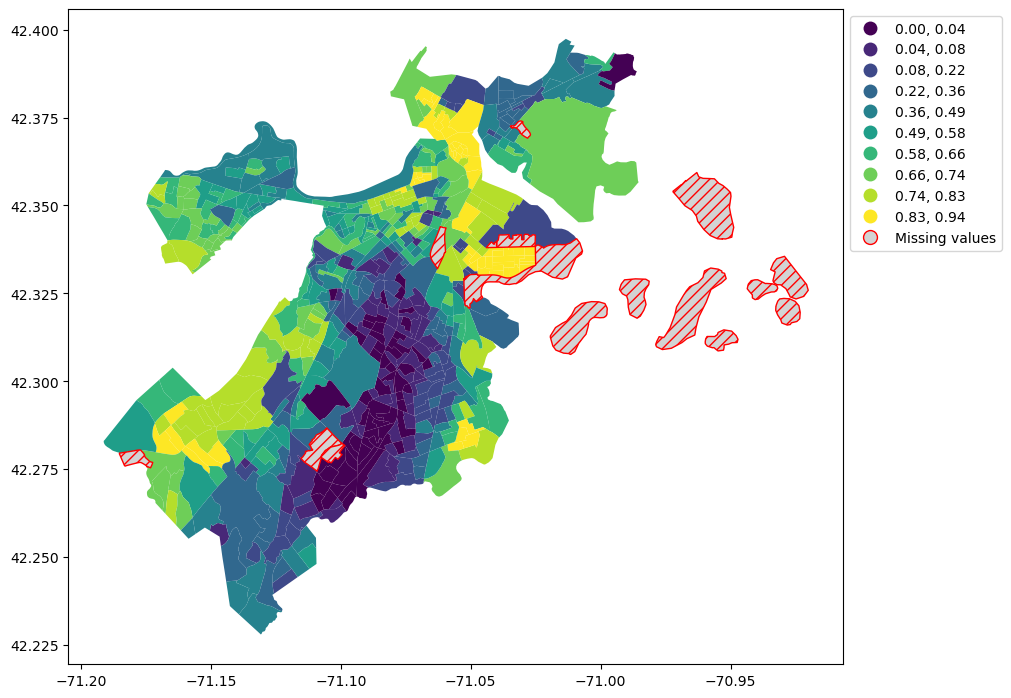

In [64]:
blockg20.plot(column='White alone Percent Total', k=10, scheme='Quantiles',legend=True
             ,legend_kwds={'bbox_to_anchor': (1, 1),'loc': 'upper left'}
             ,markersize=0.01,figsize=(10,10),
            missing_kwds={"color": "lightgrey", ## what to do with missing values
                            "edgecolor": "red",
                            "hatch": "///",
                            "label": "Missing values",},)
                                                                                    

In [65]:
blockg20 = pd.concat([blockg20, blockg20.bounds], axis=1)
blockg20.head()

,Geographic Code Identifier,Census Tract,Total:,White alone,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,...,Hispanic or Latino Percent Total,Asian alone Percent Total,American Indian and Alaska Native alone Percent Total,Native Hawaiian and Other Pacific Islander alone Percent Total,Some Other Race alone Percent Total,Population of two or more races: Percent Total,minx,miny,maxx,maxy
0,250250001011,101,1052,643,54,113,180,1,0,28,...,0.107414,0.171103,0.000951,0.000000,0.026616,0.031369,-71.136274,42.360063,-71.129769,42.363396
1,250250001012,101,824,568,29,70,94,6,0,11,...,0.084951,0.114078,0.007282,0.000000,0.013350,0.055825,-71.136962,42.358556,-71.128880,42.361072
2,250250001021,102,1020,565,42,145,160,3,0,41,...,0.142157,0.156863,0.002941,0.000000,0.040196,0.062745,-71.144487,42.357608,-71.136597,42.360801
3,250250001022,102,2694,1000,256,409,723,5,2,136,...,0.151819,0.268374,0.001856,0.000742,0.050483,0.060505,-71.160900,42.353791,-71.135310,42.364849
4,250250002011,201,966,650,25,97,121,0,0,16,...,0.100414,0.125259,0.000000,0.000000,0.016563,0.059006,-71.162558,42.354074,-71.153763,42.358625


# Racial Dot Map

In [66]:
seed = 10
s= np.random.RandomState(seed) if seed else np.random.RandomState(seed)

def gen_random_points_poly(poly, num_points):
    
    """
    Returns a list of N randomly generated points within a polygon.
    """

    min_x, min_y, max_x, max_y = poly.bounds
    points = []
    i=0
    while len(points) < num_points:
        random_point = Point([s.uniform(min_x, max_x), s.uniform(min_y, max_y)])
        if random_point.within(poly):
            points.append(random_point)
            i+=1
    return points
def gen_points_in_gdf_polys(geometry, values, points_per_value = None):
    """
    Take a GeoSeries of Polygons along with a Series of values and returns randomly generated points within
    these polygons. Optionally takes a "points_per_value" integer which indicates the number of points that
    should be generated for each 1 value.
    """
    if points_per_value:
        new_values = round(values/points_per_value).astype(int)
    else:
        new_values = values

    new_values = new_values[new_values>0]

    if(new_values.size > 0):
         
        g = gpd.GeoDataFrame(data = {'vals':new_values}, geometry = geometry)

        a = g.apply(lambda row: tuple(gen_random_points_poly(row['geometry'], row['vals'])),1)
        b = gpd.GeoSeries(a.apply(pd.Series).stack(), crs = geometry.crs)
        b.name='geometry'
        
    else:
        g = gpd.GeoDataFrame(data = {'vals':new_values*0}, geometry = geometry)

        a = g.apply(lambda row: tuple(gen_random_points_poly(row['geometry'], row['vals'])),1)
        b = gpd.GeoSeries(a.apply(pd.Series).stack(), crs = geometry.crs)
        b.name='geometry'
    
    return b

In [67]:
results = gen_points_in_gdf_polys(blockg20['geometry'],blockg20['White alone'],100)

In [68]:
results = gen_points_in_gdf_polys(blockg20['geometry'],blockg20['Native Hawaiian and Other Pacific Islander alone'])

In [69]:
results.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [70]:
blocks2020shape.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [71]:
bos_neighborhood = gpd.read_file('Data/Boston_Neighborhoods/Boston_Neighborhoods.shp')

In [72]:
bos_neighborhood = bos_neighborhood.to_crs('epsg:4326')

In [73]:
bos_neighborhood.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

White alone
Black or African American alone
Hispanic or Latino
Asian alone
American Indian and Alaska Native alone
Native Hawaiian and Other Pacific Islander alone
Some Other Race alone
Population of two or more races:


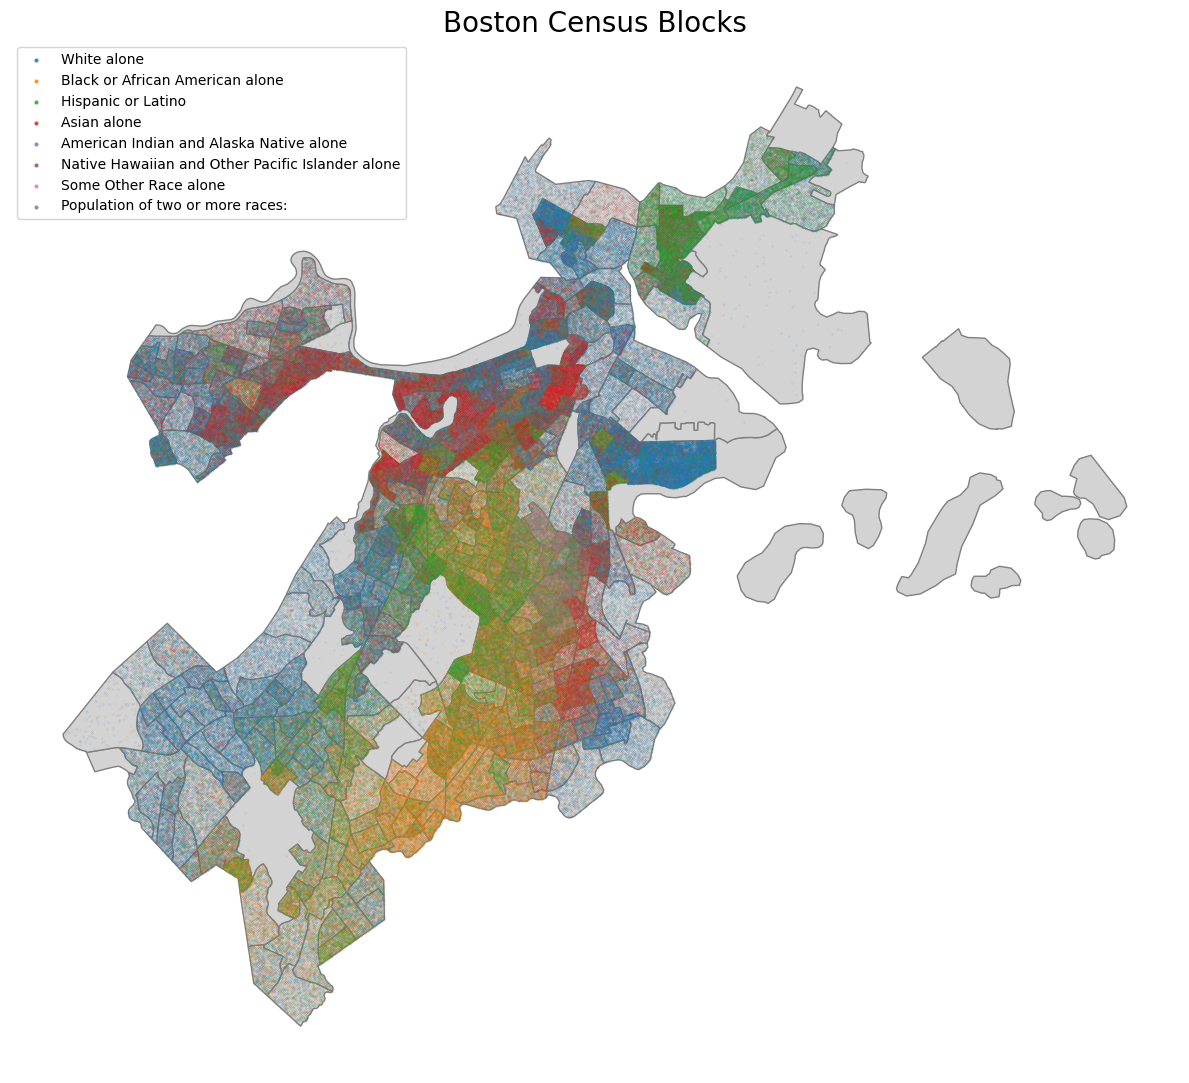

In [158]:
df = pd.DataFrame()

fig, ax = plt.subplots(figsize=(12,12))
blocks2020shape.plot(ax=ax, color = 'lightgrey', edgecolor='grey')
for race in ('White alone','Black or African American alone', 'Hispanic or Latino', 'Asian alone',
            'American Indian and Alaska Native alone', 'Native Hawaiian and Other Pacific Islander alone',
             'Some Other Race alone', 'Population of two or more races:'):
    print(race)
    df[race] = gen_points_in_gdf_polys(blockg20['geometry'],blockg20[race]) 
    gen_points_in_gdf_polys(blockg20['geometry'],blockg20[race]).plot(ax=ax, markersize = 0.01,alpha = 0.75, label = race)
    #ax.legend(race)
ax.set_title('Boston Census Blocks', fontsize=20)
ax.legend(markerscale = 20)
fig.patch.set_visible(False)
ax.axis('off')
plt.tight_layout()

# Contingency Table & Shannon Diversity Index

In [451]:
#create a pivot table of blocks/tracts and total race counts
race = ['Geographic Code Identifier','White alone','Black or African American alone', 'Hispanic or Latino', 'Asian alone',
            'American Indian and Alaska Native alone', 'Native Hawaiian and Other Pacific Islander alone',
             'Some Other Race alone', 'Population of two or more races:']
cont_tbl = blockg20[race]
cont_tbl.set_index('Geographic Code Identifier', inplace = True)

In [452]:
cont_tbl.head()

,White alone,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:
Geographic Code Identifier,,,,,,,,
250250001011,643,54,113,180,1,0,28,33
250250001012,568,29,70,94,6,0,11,46
250250001021,565,42,145,160,3,0,41,64
250250001022,1000,256,409,723,5,2,136,163
250250002011,650,25,97,121,0,0,16,57


In [453]:
cont_tbl['Total in Block Group'] = cont_tbl.sum(axis = 'columns')

In [454]:
cont_tbl.head()

,White alone,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:,Total in Block Group
Geographic Code Identifier,,,,,,,,,
250250001011,643,54,113,180,1,0,28,33,1052
250250001012,568,29,70,94,6,0,11,46,824
250250001021,565,42,145,160,3,0,41,64,1020
250250001022,1000,256,409,723,5,2,136,163,2694
250250002011,650,25,97,121,0,0,16,57,966


In [455]:
tot_race = cont_tbl.sum(axis = 'index')

In [456]:
tot_race

White alone                                         301464
Black or African American alone                     129264
Hispanic or Latino                                  126113
Asian alone                                          75588
American Indian and Alaska Native alone                989
Native Hawaiian and Other Pacific Islander alone       251
Some Other Race alone                                 9257
Population of two or more races:                     32721
Total in Block Group                                675647
dtype: int64

In [457]:
perc_race = tot_race / tot_race.sum()

In [458]:
perc_race

White alone                                         0.223093
Black or African American alone                     0.095659
Hispanic or Latino                                  0.093328
Asian alone                                         0.055937
American Indian and Alaska Native alone             0.000732
Native Hawaiian and Other Pacific Islander alone    0.000186
Some Other Race alone                               0.006850
Population of two or more races:                    0.024215
Total in Block Group                                0.500000
dtype: float64

In [459]:
perc_race.sum()

1.0

In [460]:
H_x_avg = -((perc_race*np.log2(perc_race)).sum())

In [461]:
H_x_avg

2.0479226587232793

In [462]:
cols = cont_tbl.columns.to_list()
print(cols)
print(cols[-1])
H_xlog2 = []
H_xln = []
evenness = []

for index, row in cont_tbl.iterrows():
    perc_race = np.array(row[cols[:-1]])/row[cols[-1]]
    H_log2 = -(np.nansum(perc_race*np.log2(perc_race)))
    H_xlog2.append(H_log2)
    
    H_ln = -(np.nansum(perc_race*np.log(perc_race)))
    even = H_ln/np.log(len(cols[:-1]))
    H_xln.append(H_ln)
    evenness.append(even)

cont_tbl['H_x (Log2)'] = H_xlog2
cont_tbl['H_x (Ln)'] = H_xln
cont_tbl['Evenness'] = evenness

#cont_tbl['Perc Diff from Avg H_x'] = (cont_tbl['H_x']-H_x_avg)/H_x_avg

['White alone', 'Black or African American alone', 'Hispanic or Latino', 'Asian alone', 'American Indian and Alaska Native alone', 'Native Hawaiian and Other Pacific Islander alone', 'Some Other Race alone', 'Population of two or more races:', 'Total in Block Group']
Total in Block Group


In [463]:
cont_tbl.head()

,White alone,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:,Total in Block Group,H_x (Log2),H_x (Ln),Evenness
Geographic Code Identifier,,,,,,,,,,,,
250250001011,643,54,113,180,1,0,28,33,1052,1.741023,1.206785,0.580341
250250001012,568,29,70,94,6,0,11,46,824,1.566638,1.085911,0.522213
250250001021,565,42,145,160,3,0,41,64,1020,1.942611,1.346515,0.647537
250250001022,1000,256,409,723,5,2,136,163,2694,2.262444,1.568207,0.754148
250250002011,650,25,97,121,0,0,16,57,966,1.568325,1.087080,0.522775


In [464]:
blocks2020shape.head()

,OBJECTID,STATEFP20,COUNTYFP20,TRACTCE20,BLKGRPCE20,GEOID20,NAMELSAD20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,Shape_STAr,Shape_STLe,geometry
0,1,25,025,040600,1,250250406001,Block Group 1,G5030,S,1265377.0,413598.0,+42.3833695,-071.0707743,1.807118e+07,29256.866068,"POLYGON ((-71.08097 42.38232, -71.08095 42.382..."
1,2,25,025,051101,1,250250511011,Block Group 1,G5030,S,220626.0,0.0,+42.3882285,-071.0046816,2.374654e+06,9142.174252,"POLYGON ((-71.01084 42.38613, -71.00891 42.386..."
2,3,25,025,051101,4,250250511014,Block Group 4,G5030,S,227071.0,270.0,+42.3913407,-071.0020343,2.446949e+06,11579.546171,"POLYGON ((-71.00629 42.39098, -71.00628 42.391..."
3,4,25,025,981600,1,250259816001,Block Group 1,G5030,S,586981.0,158777.0,+42.3886205,-070.9934424,8.026752e+06,16626.718823,"POLYGON ((-71.00113 42.38710, -71.00100 42.387..."
4,5,25,025,010204,3,250250102043,Block Group 3,G5030,S,145888.0,0.0,+42.3459611,-071.1020344,1.570220e+06,5510.560013,"POLYGON ((-71.10507 42.34670, -71.10457 42.346..."


In [465]:
cont_tbl = cont_tbl.merge(blocks2020shape[['GEOID20','geometry']], how = 'right',left_on = 'Geographic Code Identifier', right_on = 'GEOID20')

In [466]:
cont_tbl.head()

,White alone,Black or African American alone,Hispanic or Latino,Asian alone,American Indian and Alaska Native alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two or more races:,Total in Block Group,H_x (Log2),H_x (Ln),Evenness,GEOID20,geometry
0,1273.0,78.0,135.0,200.0,1.0,0.0,6.0,67.0,1760.0,1.391539,0.964542,0.463846,250250406001,"POLYGON ((-71.08097 42.38232, -71.08095 42.382..."
1,683.0,39.0,968.0,39.0,0.0,0.0,26.0,48.0,1803.0,1.478989,1.025157,0.492996,250250511011,"POLYGON ((-71.01084 42.38613, -71.00891 42.386..."
2,664.0,41.0,313.0,43.0,1.0,0.0,3.0,34.0,1099.0,1.502777,1.041645,0.500926,250250511014,"POLYGON ((-71.00629 42.39098, -71.00628 42.391..."
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1.000000,0.693147,0.333333,250259816001,"POLYGON ((-71.00113 42.38710, -71.00100 42.387..."
4,535.0,32.0,77.0,258.0,0.0,0.0,8.0,58.0,968.0,1.734857,1.202511,0.578286,250250102043,"POLYGON ((-71.10507 42.34670, -71.10457 42.346..."


In [467]:
cont_tbl = gpd.GeoDataFrame(cont_tbl, geometry = cont_tbl['geometry'], crs={'init': 'epsg:4326'})

<AxesSubplot:>

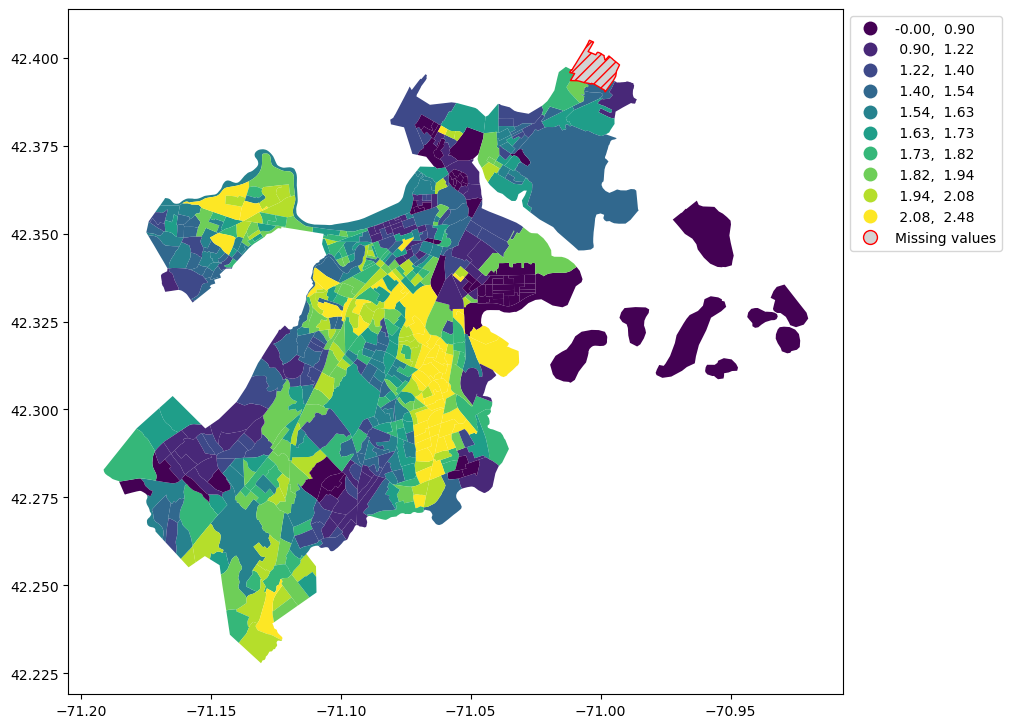

In [468]:
cont_tbl.plot(column = 'H_x (Log2)', k=10, scheme='Quantiles',legend=True
             ,legend_kwds={'bbox_to_anchor': (1, 1),'loc': 'upper left'}
             ,markersize=0.01,figsize=(10,10),
            missing_kwds={"color": "lightgrey", ## what to do with missing values
                            "edgecolor": "red",
                            "hatch": "///",
                            "label": "Missing values",},)                                              

<AxesSubplot:>

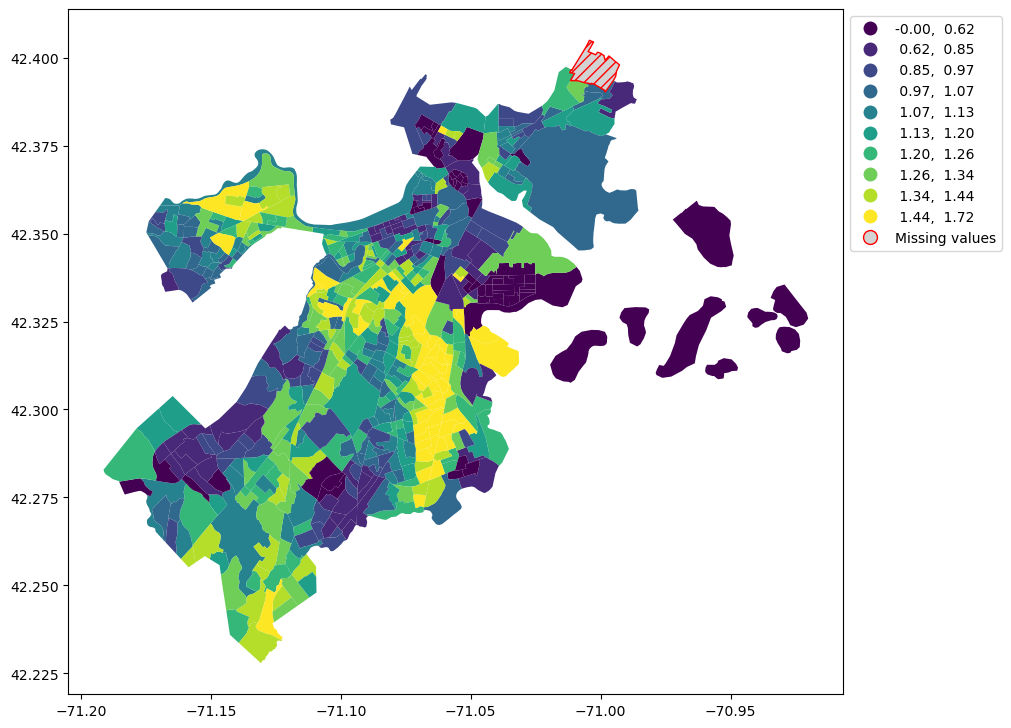

In [469]:
cont_tbl.plot(column = 'H_x (Ln)', k=10, scheme='Quantiles',legend=True
             ,legend_kwds={'bbox_to_anchor': (1, 1),'loc': 'upper left'}
             ,markersize=0.01,figsize=(10,10),
            missing_kwds={"color": "lightgrey", ## what to do with missing values
                            "edgecolor": "red",
                            "hatch": "///",
                            "label": "Missing values",},)  

<AxesSubplot:>

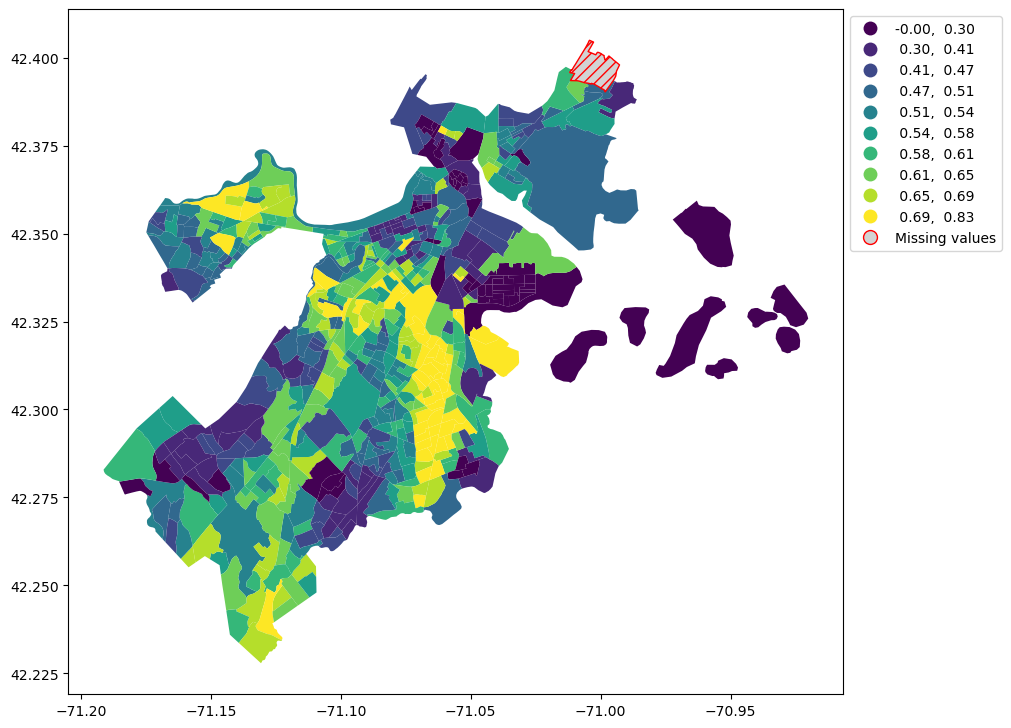

In [470]:
cont_tbl.plot(column = 'Evenness', k=10, scheme='Quantiles',legend=True
             ,legend_kwds={'bbox_to_anchor': (1, 1),'loc': 'upper left'}
             ,markersize=0.01,figsize=(10,10),
            missing_kwds={"color": "lightgrey", ## what to do with missing values
                            "edgecolor": "red",
                            "hatch": "///",
                            "label": "Missing values",},)  